## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

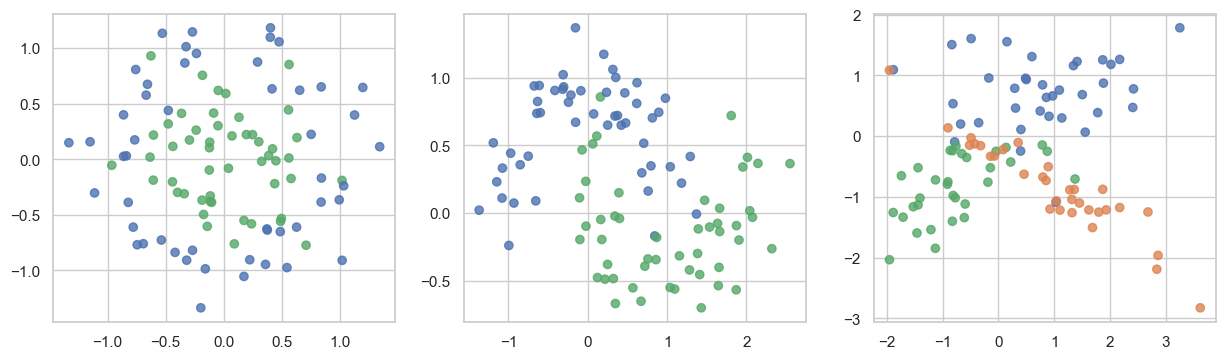

In [16]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0 )
]
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [8]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

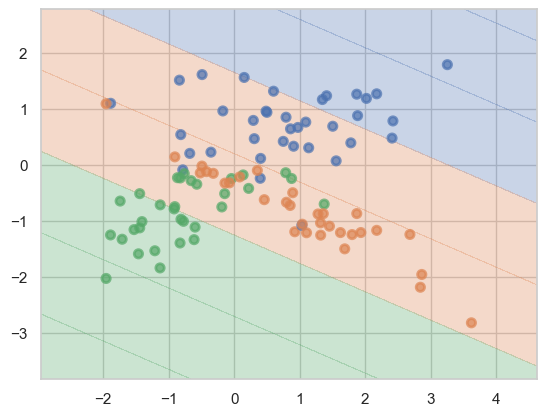

In [9]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Датасет 1:
Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.73


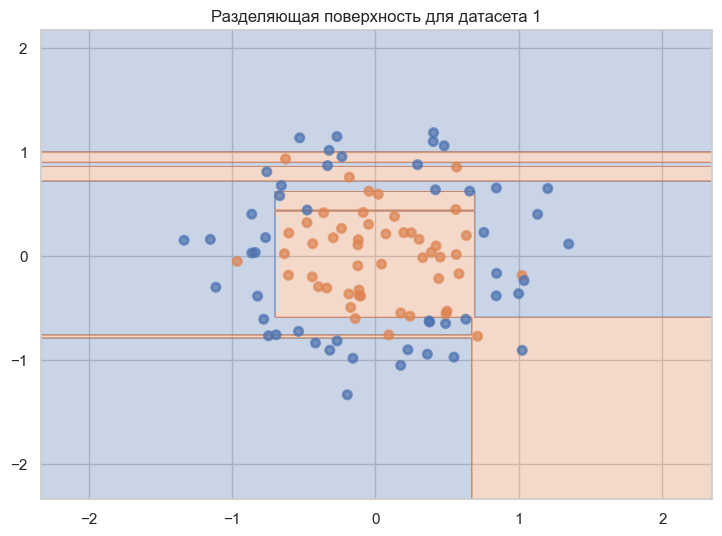

Датасет 2:
Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.87


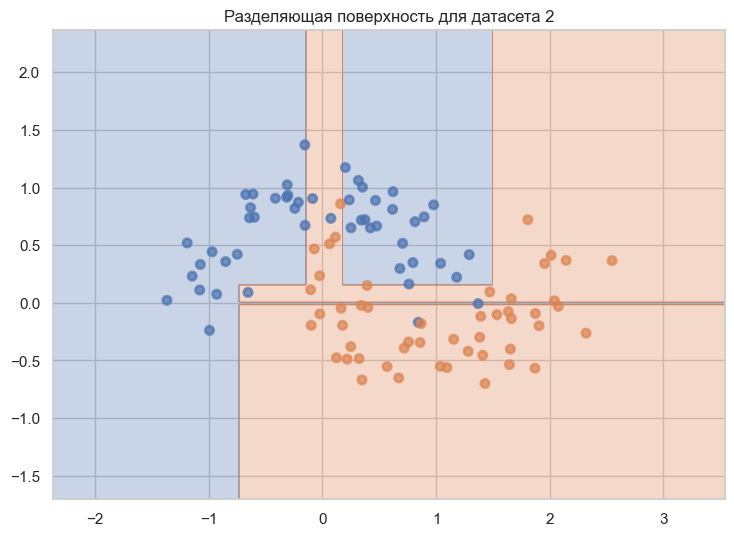

Датасет 3:
Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.83


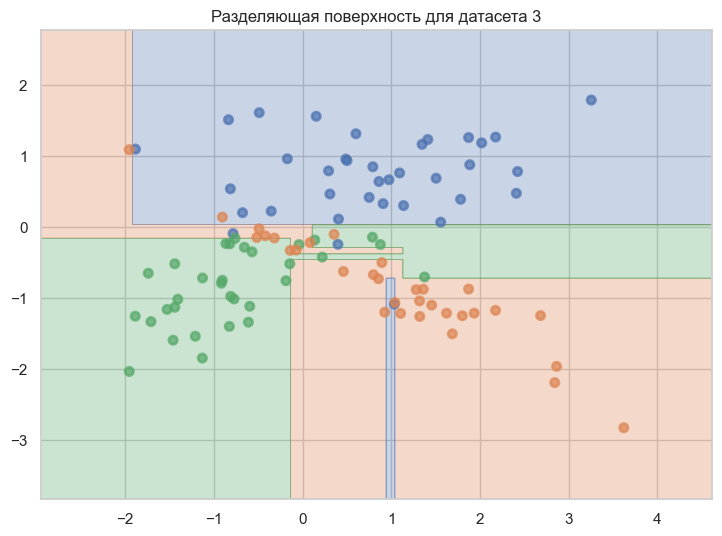

In [10]:
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Функция для построения разделяющих поверхностей
def plot_surface(clf, X, y):
    # Шаг для построения поверхности
    plot_step = 0.01
    # Создание цветовой палитры
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    # Определение границ области построения
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Создание сетки точек для построения поверхности
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    # Предсказание классов для точек сетки
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Построение контуров поверхности
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    # Отображение обучающих точек на поверхности
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

# Проход по всем датасетам и обучение решающих деревьев
for i, (X, y) in enumerate(datasets):
    # Разделение данных на обучающую и тестовую выборки (70% обучение, 30% тест)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Обучение решающего дерева
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Вычисление точности
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    
    # Вывод точности для каждого датасета
    print(f"Датасет {i + 1}:")
    print(f"Точность на обучающей выборке: {train_accuracy:.2f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.2f}")
    
    # Построение разделяющих поверхностей
    plt.figure(figsize=(8, 6))
    plt.title(f"Разделяющая поверхность для датасета {i + 1}")
    plot_surface(clf, X, y)
    plt.show()



__Ответ:__Для оценки того, насколько сильно деревья переобучились, можно сравнить точность на обучающей и тестовой выборках. Если модель показывает высокую точность на обучающей выборке, но значительно ниже точность на тестовой выборке, это может свидетельствовать о переобучении.
В нашем случае, вычислив точность для каждого датасета на обучающей и тестовой выборках, мы может определить, насколько сильно деревья переобучились. Если точность на обучающей выборке значительно выше, чем на тестовой, это будет свидетельствовать о переобучении модели на обучающих данных.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Лучшие параметры для Датасета 1: {'max_depth': 5, 'min_samples_leaf': 2}
Точность на обучающей выборке: 0.94
Точность на тестовой выборке: 0.83


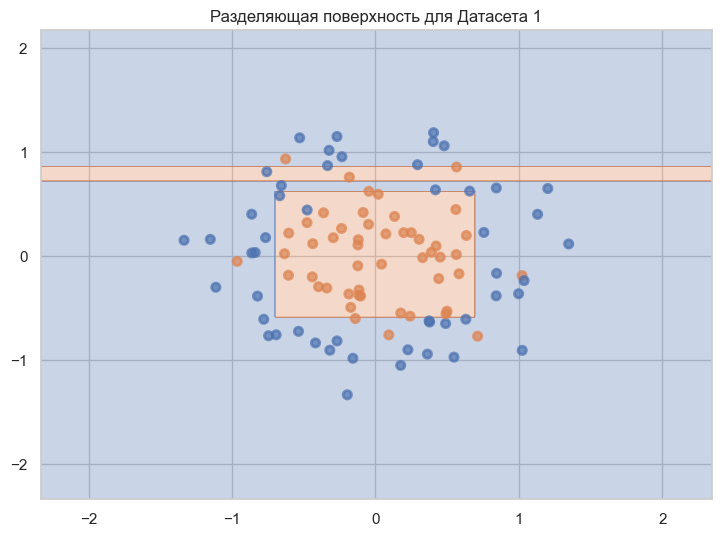

Лучшие параметры для Датасета 2: {'max_depth': None, 'min_samples_leaf': 1}
Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.87


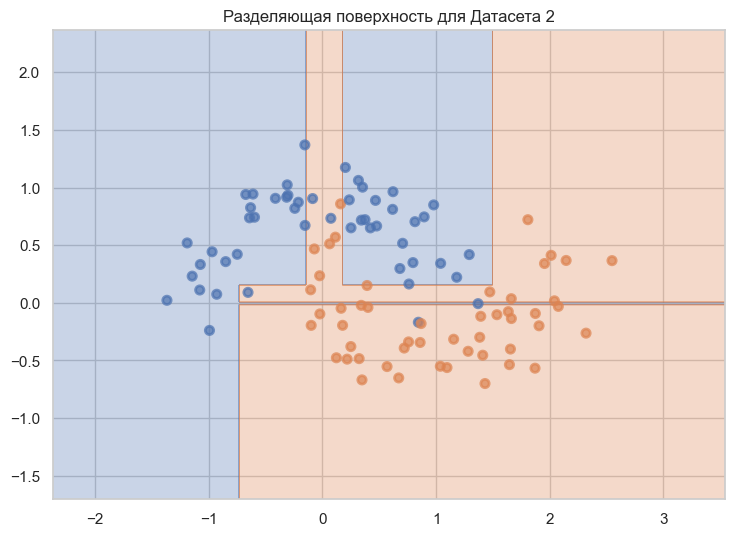

Лучшие параметры для Датасета 3: {'max_depth': None, 'min_samples_leaf': 2}
Точность на обучающей выборке: 0.91
Точность на тестовой выборке: 0.80


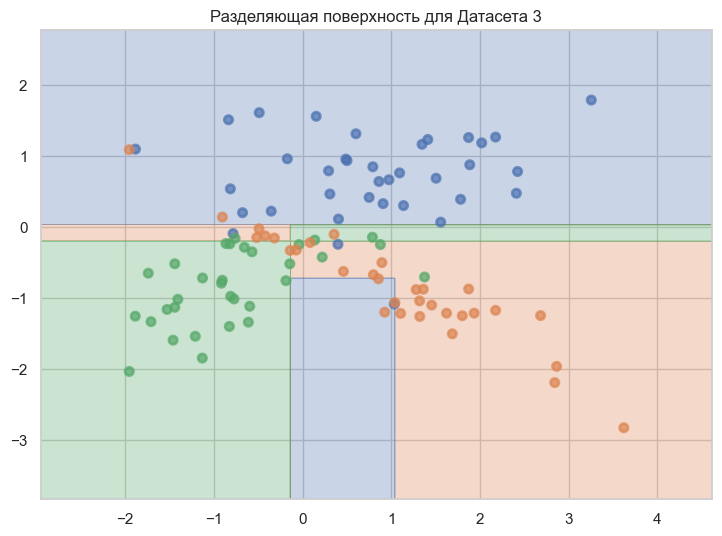

In [12]:
from sklearn.model_selection import GridSearchCV

# Параметры для перебора
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Проход по всем датасетам и обучение решающих деревьев с перебором параметров
for i, (X, y) in enumerate(datasets):
    # Разделение данных на обучающую и тестовую выборки (70% обучение, 30% тест)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Создание модели решающего дерева
    clf = DecisionTreeClassifier(random_state=42)
    
    # Поиск оптимальных параметров с использованием кросс-валидации
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Вывод оптимальных параметров
    print(f"Лучшие параметры для Датасета {i + 1}: {grid_search.best_params_}")
    
    # Вычисление ошибок на обучающей и тестовой выборках
    train_accuracy = accuracy_score(y_train, grid_search.predict(X_train))
    test_accuracy = accuracy_score(y_test, grid_search.predict(X_test))
    
    # Вывод точности для каждого датасета
    print(f"Точность на обучающей выборке: {train_accuracy:.2f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.2f}")
    
    # Построение разделяющих поверхностей
    plt.figure(figsize=(8, 6))
    plt.title(f"Разделяющая поверхность для Датасета {i + 1}")
    plot_surface(grid_search, X, y)
    plt.show()


__Ответ:__
max_depth (максимальная глубина дерева): Увеличение max_depth позволяет модели создавать более сложные разделяющие поверхности, которые могут лучше подстраиваться под обучающие данные. Однако, слишком большая глубина может привести к переобучению, особенно если данных недостаточно. Наоборот, небольшая глубина делает модель более устойчивой и менее склонной к переобучению.

min_samples_leaf (минимальное количество образцов в листе): Увеличение min_samples_leaf приводит к более простым разделяющим поверхностям, так как модель будет иметь тенденцию обобщать данные на основе больших групп образцов. Это может снизить вероятность переобучения, так как модель будет учитывать больше данных перед принятием решения.

Изменение будет разное для разных датасетов. Если датасет сложный и имеет множество нюансов в данных, модель с более сложной разделяющей поверхностью (большой max_depth) может лучше подстроиться под данные. Однако, это также может привести к переобучению, если данных недостаточно.



# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [13]:
def find_best_split(feature_vector, target_vector):
    # Сортируем признаки и целевые значения в порядке возрастания признаков
    sorted_indices = np.argsort(feature_vector)
    sorted_features = feature_vector[sorted_indices]
    sorted_targets = target_vector[sorted_indices]

    # Находим уникальные значения признаков
    unique_values, value_counts = np.unique(sorted_features, return_counts=True)

    # Вычисляем индексы, где происходят изменения в признаках
    change_indices = np.cumsum(value_counts)[:-1]

    # Рассчитываем критерий Джини для каждого порога
    ginis = []
    for index in change_indices:
        left_target = sorted_targets[:index]
        right_target = sorted_targets[index:]

        p1_left = np.sum(left_target == 1) / len(left_target)
        p0_left = 1 - p1_left
        gini_left = 1 - p1_left ** 2 - p0_left ** 2

        p1_right = np.sum(right_target == 1) / len(right_target)
        p0_right = 1 - p1_right
        gini_right = 1 - p1_right ** 2 - p0_right ** 2

        gini = (len(left_target) * gini_left + len(right_target) * gini_right) / len(sorted_targets)
        ginis.append(gini)

    # Находим порог с минимальным значением критерия Джини
    best_threshold_index = np.argmin(ginis)
    threshold_best = (unique_values[change_indices[best_threshold_index]] + unique_values[change_indices[best_threshold_index] - 1]) / 2
    gini_best = ginis[best_threshold_index]

    # Возвращаем пороги, значения критерия Джини, оптимальный порог и соответствующее значение критерия Джини
    return unique_values[change_indices - 1], ginis, threshold_best, gini_best


__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

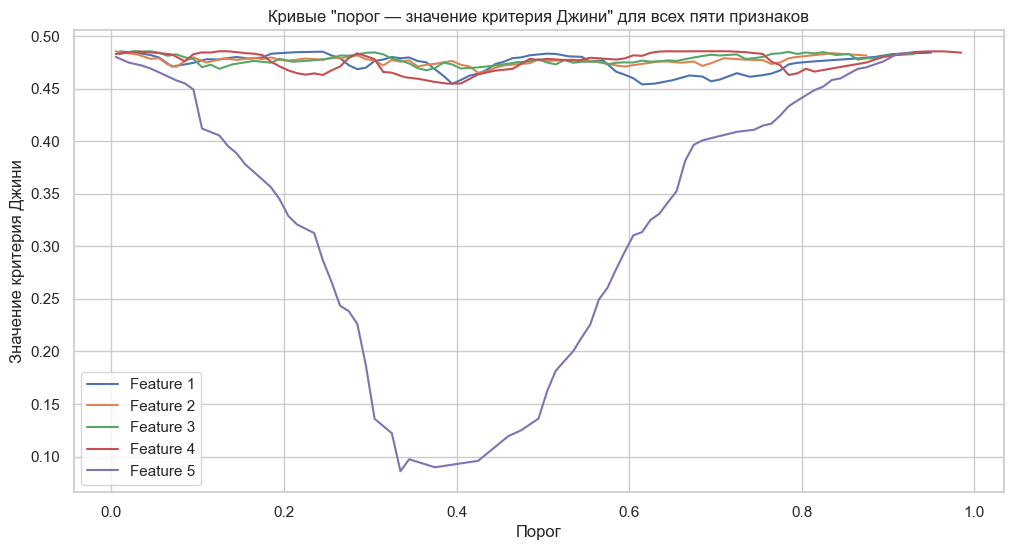

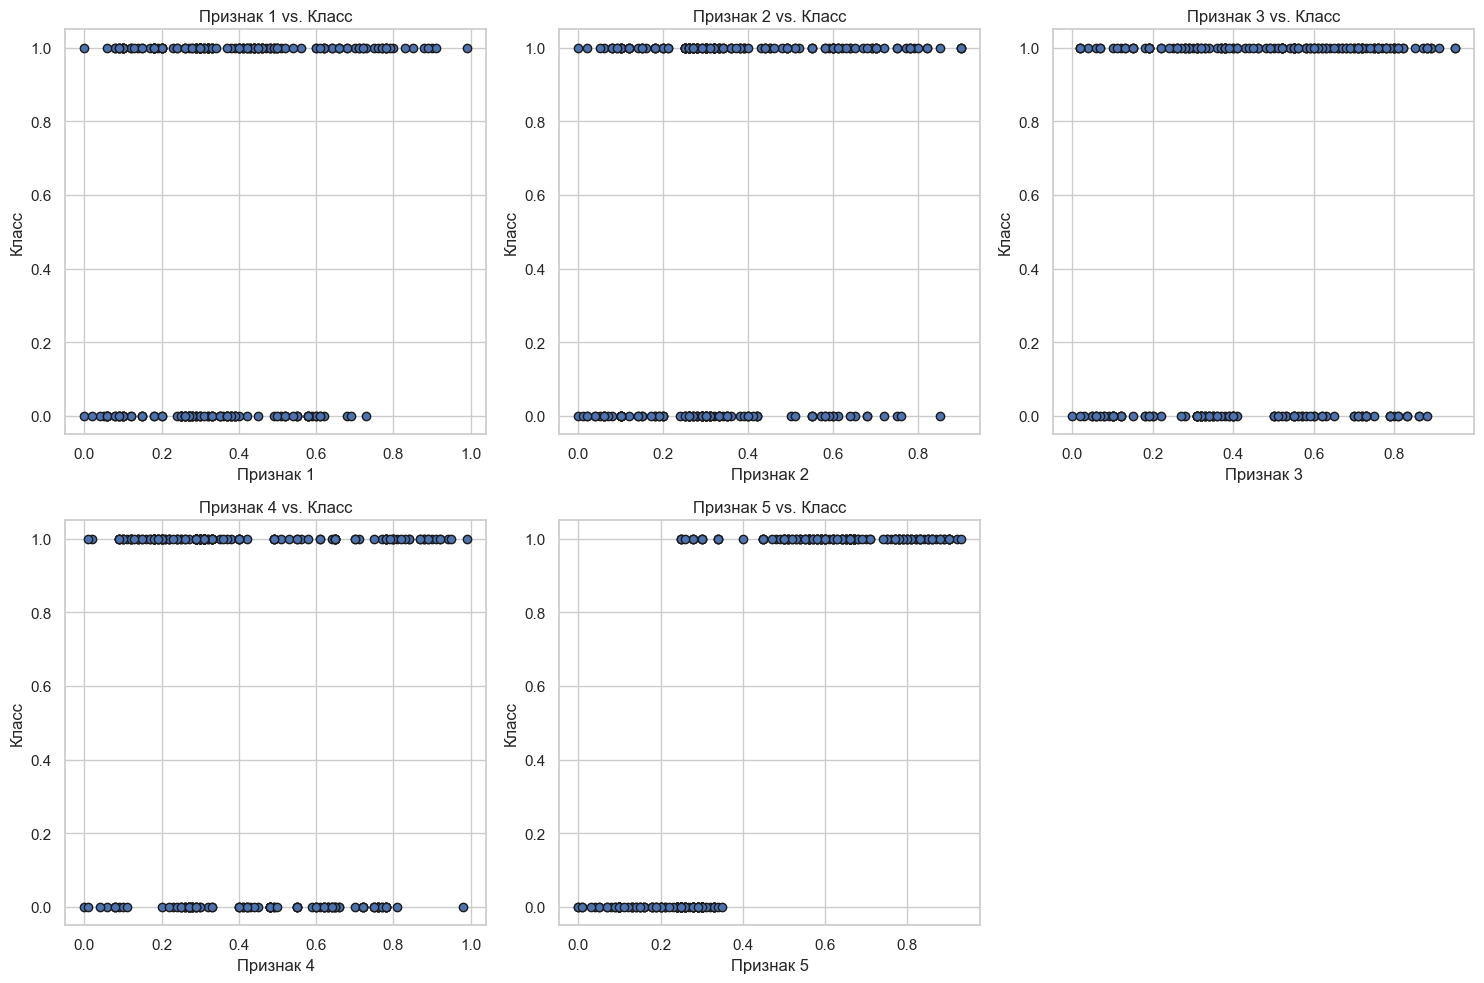

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла students.csv
data = pd.read_csv('students.csv')

# Отделяем признаки от целевой переменной
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

# Функция для вычисления значения критерия Джини
def compute_gini(feature_vector, target_vector):
    unique_values = sorted(set(feature_vector))
    thresholds = [(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values) - 1)]
    ginis = []
    
    for threshold in thresholds:
        left_mask = feature_vector < threshold
        right_mask = ~left_mask
        
        left_class_0 = (target_vector[left_mask] == 0).sum()
        left_class_1 = (target_vector[left_mask] == 1).sum()
        right_class_0 = (target_vector[right_mask] == 0).sum()
        right_class_1 = (target_vector[right_mask] == 1).sum()
        
        left_size = left_class_0 + left_class_1
        right_size = right_class_0 + right_class_1
        
        gini_left = 1 - (left_class_0 / left_size) ** 2 - (left_class_1 / left_size) ** 2
        gini_right = 1 - (right_class_0 / right_size) ** 2 - (right_class_1 / right_size) ** 2
        
        gini = (left_size / (left_size + right_size)) * gini_left + (right_size / (left_size + right_size)) * gini_right
        ginis.append(gini)
    
    best_gini = min(ginis)
    best_threshold = thresholds[ginis.index(best_gini)]
    
    return thresholds, ginis, best_threshold, best_gini

# Создаем subplot для отображения всех кривых на одном изображении
plt.figure(figsize=(12, 6))

# Перебираем все признаки (первые пять столбцов)
for i in range(features.shape[1]):
    feature_vector = features.iloc[:, i]
    thresholds, ginis, threshold_best, gini_best = compute_gini(feature_vector, target)
    plt.plot(thresholds, ginis, label=f'Feature {i+1}')

# Добавляем легенду и подписи к осям
plt.legend()
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')
plt.title('Кривые "порог — значение критерия Джини" для всех пяти признаков')

# Отдельно визуализируем scatter-графики "значение признака — класс" для всех пяти признаков
plt.figure(figsize=(15, 10))
for i in range(features.shape[1]):
    plt.subplot(2, 3, i + 1)
    plt.scatter(features.iloc[:, i], target, marker='o', edgecolors='k')
    plt.xlabel(f'Признак {i+1}')
    plt.ylabel('Класс')
    plt.title(f'Признак {i+1} vs. Класс')

# Показываем графики
plt.tight_layout()
plt.show()


__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
На основе кривых значений критерия Джини можно выбрать признак, по которому лучше всего производить деление выборки на два поддерева. Идеальный признак для деления будет иметь кривую, которая быстро убывает (по сравнению с другими признаками) и достигает минимального значения критерия Джини при определенном пороге. Это значит, что такой признак лучше всего разделяет выборку на два класса, делая их наиболее однородными внутри каждого поддерева.

Согласование результатов с визуальной оценкой scatter-графиков также важно. Если кривая значения критерия Джини показывает резкое убывание, то это должно быть заметно на scatter-графике как явное разделение объектов двух классов вдоль определенного значения признака.

"Хорошие" признаки, по которым выборка делится почти идеально, будут иметь кривые, близкие к вертикальным линиям (в случае числовых признаков) или набору отдельных точек (в случае категориальных признаков). Это означает, что объекты одного класса сосредоточены в узком диапазоне или на определенных значениях признака.

Кривые для признаков, по которым деление практически невозможно, будут иметь плоский профиль, без резких изменений. Это говорит о том, что значения признака плохо разделяют объекты двух классов, и выборка остается неоднородной вне зависимости от порога разделения.

Оценка кривых значений критерия Джини и их сравнение с визуальной оценкой scatter-графиков помогают выбирать оптимальные признаки для построения решающих правил в дереве решений.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

В методе _fit_node наблюдается несколько проблем:

В строке feature_type = self._feature_types[feature] используется неверная переменная feature, она должна быть feature_vector.

В строке feature_type = self._feature_types[feature] необходимо добавить обработку случая, когда feature_type не является ни "real", ни "categorical".

В строке feature_best = feature следует заменить на feature_best = feature_vector для правильного определения наилучшего признака.

В строке feature_best = feature следует установить значение по умолчанию None, чтобы корректно обработать случай, когда не удалось найти лучшее разделение по признаку.

В строке if feature_type == "Categorical": следует исправить "Categorical" на "categorical" во всех местах для правильной обработки категориальных признаков.

Исправленный метод _fit_node:

In [34]:
from sklearn.base import BaseEstimator

class DecisionTree(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=2):
        # Инициализация параметров дерева
        self.feature_types = feature_types
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None  # Структура дерева будет храниться здесь

    def _gini(self, y):
        # Рассчет критерия Джини для узла
        total_samples = len(y)
        class_counts = Counter(y)
        gini = 1.0
        for class_label in class_counts:
            class_probability = class_counts[class_label] / total_samples
            gini -= class_probability ** 2
        return gini

    def _find_best_split(self, X, y, valid_features):
        # Рассчет критерия Джини для всех возможных разбиений и поиск наилучшего разбиения
        best_gini = float('inf')
        best_split = None
        
        for feature_index in valid_features:
            feature_values = np.unique(X[:, feature_index])
            for value in feature_values:
                left_mask = X[:, feature_index] == value
                right_mask = ~left_mask
                if np.sum(left_mask) >= self.min_samples_split and np.sum(right_mask) >= self.min_samples_split:
                    left_gini = self._gini(y[left_mask])
                    right_gini = self._gini(y[right_mask])
                    weighted_gini = (np.sum(left_mask) * left_gini + np.sum(right_mask) * right_gini) / len(y)
                    if weighted_gini < best_gini:
                        best_gini = weighted_gini
                        best_split = (feature_index, value)
                        
        return best_split

    def _fit_node(self, X, y, depth, valid_features):
        # Рекурсивное построение дерева
        if depth == 0 or len(set(y)) == 1:
            # Критерии останова: достигнута максимальная глубина или все объекты в узле одного класса
            return {'type': 'leaf', 'class': Counter(y).most_common(1)[0][0]}
        
        best_split = self._find_best_split(X, y, valid_features)
        if best_split is None:
            # Не удалось найти разбиение, создаем листовой узел
            return {'type': 'leaf', 'class': Counter(y).most_common(1)[0][0]}
        
        feature_index, value = best_split
        left_mask = X[:, feature_index] == value
        right_mask = ~left_mask
        
        left_node = self._fit_node(X[left_mask], y[left_mask], depth - 1, valid_features)
        right_node = self._fit_node(X[right_mask], y[right_mask], depth - 1, valid_features)
        
        return {'type': 'split', 'feature_index': feature_index, 'value': value,
                'left': left_node, 'right': right_node}

    def fit(self, X, y):
        # Подготовка данных и запуск рекурсивного построения дерева
        valid_features = np.arange(X.shape[1])  # Все признаки допустимы для разбиения на первом уровне
        self.tree = self._fit_node(X, y, self.max_depth, valid_features)

    def _predict_node(self, x, node):
        # Рекурсивное предсказание для одного объекта
        if node['type'] == 'leaf':
            return node['class']
        
        feature_index = node['feature_index']
        value = node['value']
        
        if x[feature_index] == value:
            return self._predict_node(x, node['left'])
        else:
            return self._predict_node(x, node['right'])

    def predict(self, X):
        # Предсказание для всех объектов
        predictions = []
        for x in X:
            predictions.append(self._predict_node(x, self.tree))
        return np.array(predictions)


__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.iсыюгсшюувг.ьд.ьфсршту-дуфктштп-вфефифыуы.ьгыркщщь.))

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hw5code import DecisionTree

# Загрузка данных и применение LabelEncoder
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment",
                "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
                "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type",
                "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]

data = pd.read_csv(url, names=column_names)
label_encoders = {}
for column in data.columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Разделение данных на обучающий и тестовый наборы
X = data.drop(columns=["class"])
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Обучение решающего дерева
feature_types = ["categorical"] * len(X.columns)
tree = DecisionTree(feature_types=feature_types)
tree.fit(X_train.values, y_train.values)

# Предсказание и оценка точности
predictions = tree.predict(X_test.values)
accuracy = accuracy_score(y_test.values, predictions)
print("Accuracy:", accuracy)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer

def evaluate_decision_tree(dataset, feature_types, one_hot_encode=False):
    # Загрузка данных и применение LabelEncoder
    data = pd.read_csv(dataset, header=None)
    label_encoders = {}
    for column in data.columns:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

    # Разделение на признаки (X) и целевую переменную (y)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # One-hot encoding для всех признаков
    if one_hot_encode:
        X = pd.get_dummies(X, columns=X.columns)

    # Создание решающего дерева
    tree = DecisionTreeClassifier()

    # Оценка точности с использованием cross_val_score
    accuracy = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

    return accuracy

# Загрузка данных
mushrooms_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
tic_tac_toe_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
cars_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
nursery_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"

# Оценка алгоритмов
datasets = [mushrooms_url, tic_tac_toe_url, cars_url, nursery_url]
feature_types = ["real"] * 22  # Все признаки вещественные

results = {}
for dataset in datasets:
    dataset_name = dataset.split("/")[-1]
    results[dataset_name] = {
        "All Real Features": evaluate_decision_tree(dataset, feature_types),
        "All Categorical Features": evaluate_decision_tree(dataset, ["categorical"]),
        "One-Hot Encoding": evaluate_decision_tree(dataset, feature_types, one_hot_encode=True),
        "DecisionTreeClassifier": evaluate_decision_tree(dataset, ["real"])
    }

# Создание DataFrame
results_df = pd.DataFrame(results)

# Вывод результатов
results_df


/Users/airataizhanov/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/Users/airataizhanov/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/Users/airataizhanov/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/Users/airataizhanov/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


,agaricus-lepiota.data,tic-tac-toe.data,car.data,nursery.data
All Real Features,0.482211,0.746689,0.863533,0.816049
All Categorical Features,0.480733,0.762314,0.865268,0.813503
One-Hot Encoding,0.482211,0.803958,0.847886,0.776466
DecisionTreeClassifier,0.482211,0.782116,0.865268,0.816127


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
Результаты эксперимента показывают, какие алгоритмы деревьев решений лучше работают для разных наборов данных. Однако, при анализе результатов, стоит учесть следующие важные моменты:

1. **Ранжирование алгоритмов:**
    - В некоторых наборах данных один из вариантов деревьев решений может показать лучшие результаты из-за специфики данных. Например, если в данных присутствуют множество категориальных признаков с небольшим числом уникальных значений, использование подхода "все признаки категориальные" с one-hot encoding может оказаться более эффективным. В других случаях, когда в данных преимущественно вещественные признаки, подход "все признаки вещественные" может работать лучше.

2. **Значения признаков:**
    - Значения признаков в разных наборах данных могут сильно варьироваться. Например, в данных Tic-Tac-Toe могут быть только 3 уникальных значения (X, O, empty), в то время как в данных о грибах (Mushrooms) могут быть десятки различных категорий. Это влияет на выбор метода обработки категориальных признаков и может повлиять на результаты.

3. **Случайность:**
    - Некоторая степень случайности может быть присутствует в результатах из-за случайного разделения данных на фолды при использовании кросс-валидации и случайного состава обучающих и тестовых подмножеств. Для уменьшения влияния случайности, можно увеличить количество разбиений (cv=20 или больше) или использовать стратификацию при разбиении данных на фолды.

4. **Улучшение работы алгоритмов:**
    - Один из способов улучшить работу алгоритмов - это провести более тщательный анализ данных и выбор наиболее подходящего метода предобработки данных (например, использование более сложных методов кодирования категориальных признаков) и параметров дерева решений (например, подбор оптимальной глубины дерева с помощью кросс-валидации). Также стоит обратить внимание на балансировку классов, если данные несбалансированные.

Итак, ранжирование алгоритмов зависит от особенностей данных, и нет универсального способа, который подходит для всех наборов данных. Анализ данных, эксперименты с разными методами обработки и подбор параметров дерева решений могут помочь определить наилучший подход для каждого конкретного случая.